In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

abs_path = os.walk(r".\intervalDataset")

dataSet = np.zeros((40, 280, 320))
i = 0
for path, dir_list, file_list in abs_path:
    for file_name in file_list:
        print(os.path.join(path, file_name))
        pil_img = Image.open(os.path.join(path, file_name))
        np_img = np.array(pil_img)
        dataSet[i] = np_img
        i += 1

.\photo\dz\L\1.jpeg


ValueError: could not broadcast input array from shape (480,640,3) into shape (280,320)

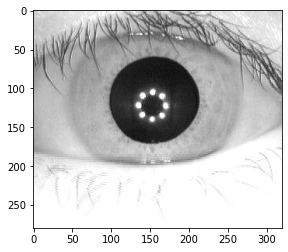

In [4]:
plt.imshow(dataSet[0, :, :], cmap='gray')
plt.show()

Canny边缘检测

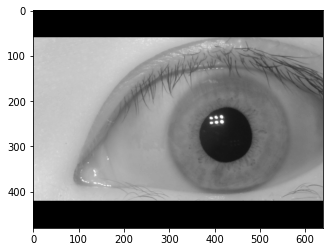

In [53]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./photo/dz/L/3.jpeg", 0)
plt.imshow(img, cmap='gray')
# img = cv2.GaussianBlur(img, (3, 3), 0)
# ret, img = cv2.threshold(img, cv2.THRESH_OTSU, 255, cv2.THRESH_BINARY)
img = cv2.Canny(img, 45, 110)

# cv2.imshow('Canny', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

二值化检测中心点

In [84]:
img = cv2.imread("./photo/ycr/R/20.jpeg", 0)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.medianBlur(img, 11)
ret, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
# img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# img = cv2.bitwise_not(img)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
# img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2, 50,
                           param1=110, param2=20, minRadius=20, maxRadius=130)
circle = np.int16(np.around(circles))[0][0]
# eye_mask = cv2.circle(cimg, (circle[0], circle[1]), circle[2] + 3, 0, thickness=-1)
# draw the outer circle
cv2.circle(cimg, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
# draw the center of the circle
cv2.circle(cimg, (circle[0], circle[1]), 2, (0, 0, 255), 3)
col_sum = np.sum(img, axis=0)  # 按列求和
row_sum = np.sum(img, axis=1)  # 按行求和
col_min = np.argmax(col_sum)
row_min = np.argmax(row_sum)
center = np.array((np.argmax(col_sum), np.argmax(row_sum)))
cv2.circle(img, (col_min, row_min), 2, (0, 0, 0), 3)
cv2.imshow('Canny', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

霍夫圆检测

In [39]:
img = cv2.imread("./intervalDataset/001/R/S1001R08.jpg", 0)
img = cv2.GaussianBlur(img, (3, 3), 0)
img = cv2.Canny(img, 45, 110)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2, 50,
                           param1=110, param2=20, minRadius=10, maxRadius=130)
circles = np.int16(np.around(circles))
distance = np.zeros(len(circles[0]))
for index, value in enumerate(circles[0, :]):
    distance[index] = np.linalg.norm(center - np.array((value[0], value[1])))
center = np.argmin(distance)
shortest = circles[0][center]
for shortest in circles[0, :]:
    # draw the outer circle
    cv2.circle(cimg, (shortest[0], shortest[1]), shortest[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(cimg, (shortest[0], shortest[1]), 2, (0, 0, 255), 3)
cv2.circle(cimg, (col_min, row_min), 2, (255, 0, 0), 3)
cv2.imshow('detected circles', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

inner整合

In [15]:
import cv2
from util.innerCircle import innerCircle

img = cv2.imread("./photo/lxy/L/6.jpeg", 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# center = getCenter(img)
inner = innerCircle(img)
# draw the outer circle
cv2.circle(cimg, (inner[0], inner[1]), inner[2], (0, 255, 0), 2)
# draw the center of the circle
cv2.circle(cimg, (inner[0], inner[1]), 2, (0, 0, 255), 3)
# cv2.circle(cimg, (col_min, row_min), 2, (255, 0, 0), 3)
cv2.imshow('detected circles', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
import numpy as np
from cv2 import CV_32F

# img = cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0)
# img = cv2.GaussianBlur(img, (3, 3), 0)
# # clip_img = cv2.Canny(clip_img, 10, 50)
# kernel1 = np.array((
#     [0, 0, 0],
#     [-1, 0, 1],
#     [0, 0, 0]), dtype="float32")
# kernel2 = np.array((
#     [0, -1, 0],
#     [0, 0, 0],
#     [0, 1, 0]), dtype="float32")
# kernel3 = np.array((
#     [-1, 0, 0],
#     [0, 0, 0],
#     [0, 0, 1]), dtype="float32")
# kernel4 = np.array((
#     [0, 0, -1],
#     [0, 0, 0],
#     [1, 0, 0]), dtype="float32")
# img1 = cv2.filter2D(img, CV_32F, kernel1)
# img2 = cv2.filter2D(img, CV_32F, kernel2)
# img3 = cv2.filter2D(img, CV_32F, kernel3)
# img4 = cv2.filter2D(img, CV_32F, kernel4)
# X_img = img1 + 0.5 * (img3 + img4)
# Y_img = img2 + 0.5 * (img3 - img4)
# Grad_img = np.sqrt(np.square(X_img) + np.square(Y_img))
# Grad_img = cv2.convertScaleAbs(Grad_img)
# Grad_img = cv2.equalizeHist(Grad_img)
# cv2.imshow('Grad_img', Grad_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [70]:
import cv2
import numpy as np
from util.innerCircle import innerCircle

img = cv2.imread("./photo/lxy/R/2.jpeg", 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cimg1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
inner = innerCircle(img)
clip_img = img[(inner[1] - inner[2]): (inner[1] + inner[2]), :]
clip_img = cv2.equalizeHist(clip_img)
clip_img = cv2.GaussianBlur(clip_img, (9, 9), 0)
clip_img = cv2.medianBlur(clip_img, 9)
# img = cv2.medianBlur(img, 11)
# img = cv2.medianBlur(img, 11)
# eye_edges = cv2.Canny(clip_img, threshold1=15, threshold2=30, L2gradient=True)
circles = cv2.HoughCircles(clip_img, cv2.HOUGH_GRADIENT, 2, 5,
                           param1=30, param2=20, minRadius=int(inner[2] * 1.35), maxRadius=int(inner[2] * 3))
circles = np.int16(np.around(circles))
circles[0, :, 1] += inner[1] - inner[2]
# circles[0, :, 0] += inner[0] - inner[2] * 4
# cv2.imshow('detected circles', clip_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

for shortest in circles[0, :]:
    # draw the outer circle
    cv2.circle(cimg, (shortest[0], shortest[1]), shortest[2], (0, 255, 0), 1)
    # draw the center of the circle
    cv2.circle(cimg, (shortest[0], shortest[1]), 2, (0, 0, 255), 3)
distance = np.zeros(len(circles[0]))
for index, value in enumerate(circles[0, :]):
    distance[index] = np.linalg.norm((np.array((inner[0], inner[1])) - np.array((value[0], value[1]))))
best_fit_index = np.argmin(distance)
best_fit = circles[0][np.argmin(distance)]
# draw the outer circle
cv2.circle(cimg1, (best_fit[0], best_fit[1]), best_fit[2], (0, 255, 0), 2)
# draw the center of the circle
cv2.circle(cimg1, (best_fit[0], best_fit[1]), 2, (0, 0, 255), 3)
# draw the outer circle
cv2.circle(cimg1, (inner[0], inner[1]), inner[2], (0, 255, 0), 2)
# draw the center of the circle
cv2.circle(cimg1, (inner[0], inner[1]), 2, (0, 0, 255), 3)
# cv2.imshow('detected circles', cimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imshow('detected circles', cimg1)
cv2.waitKey(0)
cv2.destroyAllWindows()

inner、outer整合

In [7]:
import numpy as np
import cv2
from util.innerCircle import innerCircle
from util.outerCircle import outerCircle
from util.visualization import displayCircle

In [8]:
%%time

img = cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0)
inner = innerCircle(img)
outer = outerCircle(img, inner)
displayCircle(img, inner[0], inner[1], inner[2], outer[0], outer[1], outer[2])

Wall time: 1.91 s


去掉眼皮

In [140]:
# img = cv2.imread("./intervalDataset/001/R/S1001R01.jpg", 0)
# img = cv2.bilateralFilter(img, 9, 75, 75)
# img = cv2.GaussianBlur(img, (11, 11), 0)
# img = cv2.medianBlur(img, 11)
# # img = cv2.equalizeHist(img)
# # img = cv2.Canny(img, threshold1=15, threshold2=35, L2gradient=True)
# img = cv2.Sobel(img, -1, 0, 1, ksize=3)
# ret, img = cv2.threshold(img, 15, 255, cv2.THRESH_BINARY)
# cv2.imshow('img_y', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

规范化

In [9]:
from util.normalize import normalize

height = 40
width = 512
polar_array, polar_noise = normalize(img, outer[0], outer[1], outer[2], inner[0], inner[1], inner[2], height, width)
cv2.imshow('polar_array', polar_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

一维静态小波变换

In [10]:
import pywt

level = 7
swt_list = np.zeros((height, level + 1, width))
for index, value in enumerate(polar_array):
    # cA7, cD7, cD6, cD5, cD4, cD3, cD2, cD1
    swt_coeffs = pywt.swt(data=value, wavelet='db3', level=level, trim_approx=True)
    swt_list[index] = np.array(swt_coeffs)

特征二值化

In [11]:
for i in swt_list:
    for j in i:
        j[j > 0] = 1
        j[j < 0] = 0

特征可视化

In [12]:
feature_7 = swt_list[:, 1, :]
feature_6 = swt_list[:, 2, :]
feature_5 = swt_list[:, 3, :]
feature_4 = swt_list[:, 4, :]
feature_3 = swt_list[:, 5, :]
feature_2 = swt_list[:, 6, :]
feature_1 = swt_list[:, 7, :]
cv2.imshow('polar_array', polar_array)
cv2.imshow('feature_7', feature_7)
cv2.imshow('feature_6', feature_6)
cv2.imshow('feature_5', feature_5)
cv2.imshow('feature_4', feature_4)
cv2.imshow('feature_3', feature_3)
cv2.imshow('feature_2', feature_2)
cv2.imshow('feature_1', feature_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

整合

In [5]:
import numpy as np
import cv2
from util.innerCircle import innerCircle
from util.outerCircle import outerCircle
from util.visualization import displayCircle
from util.normalize import normalize
from util.feature import swtFeatureMap

height = 40
width = 512
img = cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0)
inner = innerCircle(img)
outer = outerCircle(img, inner)
polar_array, polar_noise = normalize(img, outer[0], outer[1], outer[2], inner[0], inner[1], inner[2], height, width)
feature = swtFeatureMap(polar_array, wavelet='db3', level=7)
cv2.imshow('feature', feature)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
from util.feature import getFeatureMap

feature_1 = getFeatureMap(cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0))
feature_2 = getFeatureMap(cv2.imread("./intervalDataset/001/R/S1001R10.jpg", 0))
feature_3 = getFeatureMap(cv2.imread("./intervalDataset/002/L/S1002L03.jpg", 0))
same_distance = np.count_nonzero(feature_1 !=feature_2)
diff_distance = np.count_nonzero(feature_1 !=feature_3)
print(same_distance)
print(diff_distance)

32517
31289


一维Mallat小波变换

In [18]:
import pywt

level = 7
coeff_list = np.zeros((height, level + 1, width))
for index, value in enumerate(polar_array):
    # cA7, cD7, cD6, cD5, cD4, cD3, cD2, cD1
    coeffs = pywt.wavedec(data=value, wavelet='db3', level=level)
    for i, coeff in enumerate(coeffs):
       coeffs[i] = np.pad(np.array(coeff), (0, width - len(coeff)), 'constant') # 末尾补零至等长
    coeff_list[index] = np.array(coeffs)
feature = coeff_list.reshape((-1, 512))

In [7]:
import numpy as np
from util.feature import getFeatureMap

feature_1 = getFeatureMap(cv2.imread("./intervalDataset/001/L/S1001L02.jpg", 0), 'swt')
feature_2 = getFeatureMap(cv2.imread("./intervalDataset/001/R/S1001R06.jpg", 0), 'swt')
feature_3 = getFeatureMap(cv2.imread("./intervalDataset/002/L/S1002L03.jpg", 0), 'swt')
feature_4 = getFeatureMap(cv2.imread("./intervalDataset/002/R/S1002R04.jpg", 0), 'swt')
same_distance = np.count_nonzero(feature_1 !=feature_2)
diff_distance = np.count_nonzero(feature_3 !=feature_4)
print(same_distance)
print(diff_distance)

18840
20528
